<a href="https://colab.research.google.com/github/ayush24578/Final-Assignment-Concepts-and-Technologies-of-AI-/blob/main/2507084_AyushDhungana_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a regression task on the "Canadian_climate_history.csv" dataset by loading and understanding the data, conducting exploratory data analysis, building a neural network model, training and optimizing two classical machine learning regression models, applying feature selection, and finally comparing the performance of all models to summarize the findings.

## Data Loading & Understanding

### Subtask:
Load the `Canadian_climate_history.csv` dataset into a pandas DataFrame. Display its structure, information (e.g., `df.info()`), and summary statistics (`df.describe()`). Check for missing values (`df.isnull().sum()`), duplicate rows (`df.duplicated().sum()`), and potential outliers. Briefly describe the features and identify a continuous target variable for regression. Ask and answer 2-3 meaningful analytical questions about the dataset.


**Reasoning**:
First, I'll load the `Canadian_climate_history.csv` dataset into a pandas DataFrame, then display its head, information, descriptive statistics, and check for missing values and duplicates. This covers the initial data loading and understanding steps.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Canadian_climate_history.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Calculate and display missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Calculate and display duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

First 5 rows of the DataFrame:
             LOCAL_DATE  MEAN_TEMPERATURE_CALGARY  \
0  01-Jan-1940 00:00:00                     -11.4   
1  02-Jan-1940 00:00:00                     -12.0   
2  03-Jan-1940 00:00:00                     -12.0   
3  04-Jan-1940 00:00:00                     -11.4   
4  05-Jan-1940 00:00:00                     -13.1   

   TOTAL_PRECIPITATION_CALGARY  MEAN_TEMPERATURE_EDMONTON  \
0                          0.5                        NaN   
1                          0.5                        NaN   
2                          1.0                        NaN   
3                          0.8                        NaN   
4                          0.5                        NaN   

   TOTAL_PRECIPITATION_EDMONTON  MEAN_TEMPERATURE_HALIFAX  \
0                           NaN                       NaN   
1                           NaN                       NaN   
2                           NaN                       NaN   
3                           NaN        

### Feature Description and Target Variable Identification

The dataset `Canadian_climate_history.csv` contains daily climate data for several major Canadian cities, including Calgary, Edmonton, Halifax, Moncton, Montreal, Ottawa, Quebec, Saskatoon, St. Johns, Toronto, Vancouver, Whitehorse, and Winnipeg.

Each city generally has two main climate features:
-   `MEAN_TEMPERATURE_[CITY_NAME]`: Represents the mean daily temperature for a given city in Celsius.
-   `TOTAL_PRECIPITATION_[CITY_NAME]`: Represents the total daily precipitation (rain, snow, etc.) for a given city in millimeters.

Additionally, there is a `LOCAL_DATE` column, which indicates the date and time of the climate recording.

**Target Variable for Regression:**
For a regression task, a suitable continuous target variable would be one of the `MEAN_TEMPERATURE_[CITY_NAME]` columns, for example, `MEAN_TEMPERATURE_CALGARY`. This is a continuous numerical variable that can be predicted based on other climate features and temporal data, making it ideal for a regression model to estimate future temperatures.

### Analytical Questions and Answers

1.  **What is the time range covered by this dataset?**
    -   To answer this, we need to convert `LOCAL_DATE` to datetime objects and find the minimum and maximum dates.

2.  **Which city has the highest average mean temperature and which has the lowest over the entire period?**
    -   This can be determined by calculating the mean of all `MEAN_TEMPERATURE` columns and comparing them.

3.  **Are there any observable trends in precipitation or temperature over time for a specific city (e.g., Calgary)?**
    -   This would involve analyzing the time series data for a city's temperature and precipitation, possibly by plotting or looking at yearly averages. For this initial analysis, we can look at the distribution and range to get an idea.

**Reasoning**:
To answer the first analytical question regarding the time range, I need to convert the 'LOCAL_DATE' column to datetime objects and then find the minimum and maximum dates within the dataset.



In [2]:
df['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])
min_date = df['LOCAL_DATE'].min()
max_date = df['LOCAL_DATE'].max()

print(f"Time range of the dataset: From {min_date} to {max_date}")

Time range of the dataset: From 1940-01-01 00:00:00 to 2020-01-01 00:00:00


**Reasoning**:
To answer the second analytical question about which city has the highest and lowest average mean temperature, I will calculate the mean for all columns starting with 'MEAN_TEMPERATURE_', then identify the city corresponding to the maximum and minimum average temperatures.



In [3]:
temp_cols = [col for col in df.columns if 'MEAN_TEMPERATURE' in col]

avg_temps = df[temp_cols].mean().sort_values(ascending=False)

highest_avg_temp_city = avg_temps.index[0].replace('MEAN_TEMPERATURE_', '')
highest_avg_temp_value = avg_temps.iloc[0]

lowest_avg_temp_city = avg_temps.index[-1].replace('MEAN_TEMPERATURE_', '')
lowest_avg_temp_value = avg_temps.iloc[-1]

print(f"\nCity with the highest average mean temperature: {highest_avg_temp_city} ({highest_avg_temp_value:.2f}°C)")
print(f"City with the lowest average mean temperature: {lowest_avg_temp_city} ({lowest_avg_temp_value:.2f}°C)")


City with the highest average mean temperature: VANCOUVER (10.15°C)
City with the lowest average mean temperature: WHITEHORSE (-0.42°C)


### Answering Analytical Question 3: Observable Trends in Temperature and Precipitation for Calgary

To identify observable trends in temperature and precipitation over time for a specific city, we will focus on Calgary as an example. We can achieve this by:

1.  Extracting the year from the `LOCAL_DATE` column.
2.  Calculating the yearly average of `MEAN_TEMPERATURE_CALGARY`.
3.  Calculating the yearly sum of `TOTAL_PRECIPITATION_CALGARY`.
4.  Plotting these yearly averages/sums to visualize any potential trends.

**Reasoning**:
To answer the third analytical question, I will now extract the year from the 'LOCAL_DATE' column, calculate the yearly average mean temperature and yearly total precipitation for Calgary, and then display the head of the resulting aggregated DataFrame. This will prepare the data for visualization.



In [4]:
df['YEAR'] = df['LOCAL_DATE'].dt.year

yearly_calgary_temp = df.groupby('YEAR')['MEAN_TEMPERATURE_CALGARY'].mean().reset_index()
yearly_calgary_precip = df.groupby('YEAR')['TOTAL_PRECIPITATION_CALGARY'].sum().reset_index()

print("Yearly Mean Temperature for Calgary (first 5 rows):")
print(yearly_calgary_temp.head())

print("\nYearly Total Precipitation for Calgary (first 5 rows):")
print(yearly_calgary_precip.head())

Yearly Mean Temperature for Calgary (first 5 rows):
   YEAR  MEAN_TEMPERATURE_CALGARY
0  1940                  3.704098
1  1941                  4.907671
2  1942                  3.994795
3  1943                  4.458082
4  1944                  4.964208

Yearly Total Precipitation for Calgary (first 5 rows):
   YEAR  TOTAL_PRECIPITATION_CALGARY
0  1940                        456.7
1  1941                        392.1
2  1942                        522.5
3  1943                        336.3
4  1944                        432.9


**Reasoning**:
To visualize the trends for Calgary's mean temperature and total precipitation over time, I will create two line plots. This will directly address the third analytical question by showing how these climate features have changed yearly.



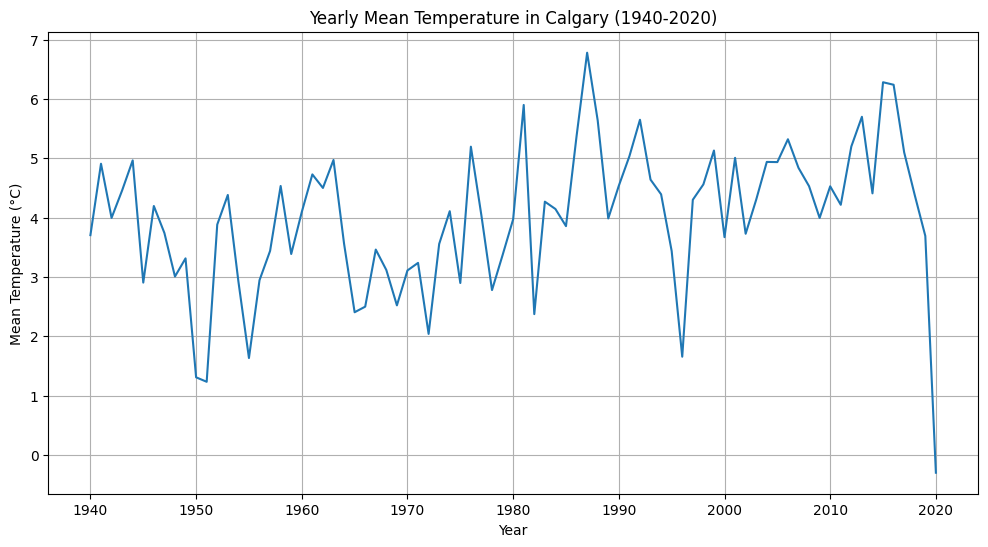

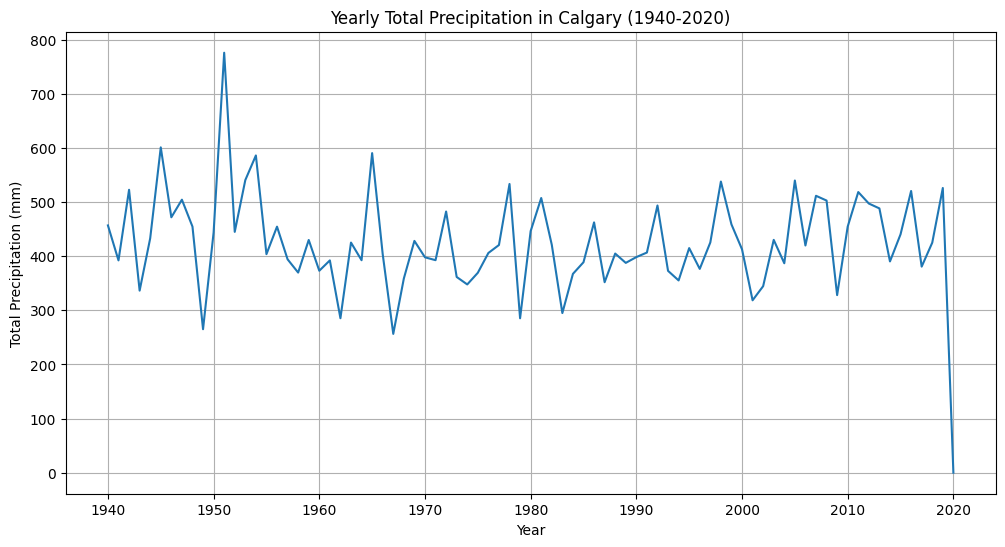

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting yearly mean temperature for Calgary
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='MEAN_TEMPERATURE_CALGARY', data=yearly_calgary_temp)
plt.title('Yearly Mean Temperature in Calgary (1940-2020)')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.grid(True)
plt.show()

# Plotting yearly total precipitation for Calgary
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='TOTAL_PRECIPITATION_CALGARY', data=yearly_calgary_precip)
plt.title('Yearly Total Precipitation in Calgary (1940-2020)')
plt.xlabel('Year')
plt.ylabel('Total Precipitation (mm)')
plt.grid(True)
plt.show()


## Exploratory Data Analysis: Data Cleaning and Feature Engineering

### Subtask:
Perform data cleaning by engineering additional time-based features from 'LOCAL_DATE' and handling missing values in numerical columns through median imputation.


**Reasoning**:
I will engineer new time-based features from the 'LOCAL_DATE' column, identify numerical columns, and then impute missing values in those columns using their respective medians. Finally, I will verify that all missing values have been handled.



In [6]:
df['MONTH'] = df['LOCAL_DATE'].dt.month
df['DAY_OF_YEAR'] = df['LOCAL_DATE'].dt.dayofyear
df['DAY_OF_WEEK'] = df['LOCAL_DATE'].dt.dayofweek

# Identify numerical columns for imputation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numerical columns with their median
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Verify that there are no remaining missing values
print("\nMissing Values after imputation:")
print(df.isnull().sum().sum())


Missing Values after imputation:
0


/tmp/ipython-input-1698532317.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


**Reasoning**:
The previous code block produced a `FutureWarning` due to chained assignment with `inplace=True`. To resolve this and ensure correct behavior, I will modify the `fillna` operation to assign the result back to the column directly, i.e., `df[col] = df[col].fillna(median_val)`.



In [7]:
df['MONTH'] = df['LOCAL_DATE'].dt.month
df['DAY_OF_YEAR'] = df['LOCAL_DATE'].dt.dayofyear
df['DAY_OF_WEEK'] = df['LOCAL_DATE'].dt.dayofweek

# Identify numerical columns for imputation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values in numerical columns with their median
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Verify that there are no remaining missing values
print("\nMissing Values after imputation:")
print(df.isnull().sum().sum())


Missing Values after imputation:
0


## Exploratory Data Analysis

### Subtask:
Create relevant visualizations (histograms, scatter plots, box plots, correlation matrix) to understand data distribution, relationships between features, and identify potential insights.


**Reasoning**:
I will create histograms for a selection of key numerical features to visualize their distributions, as requested by the subtask.



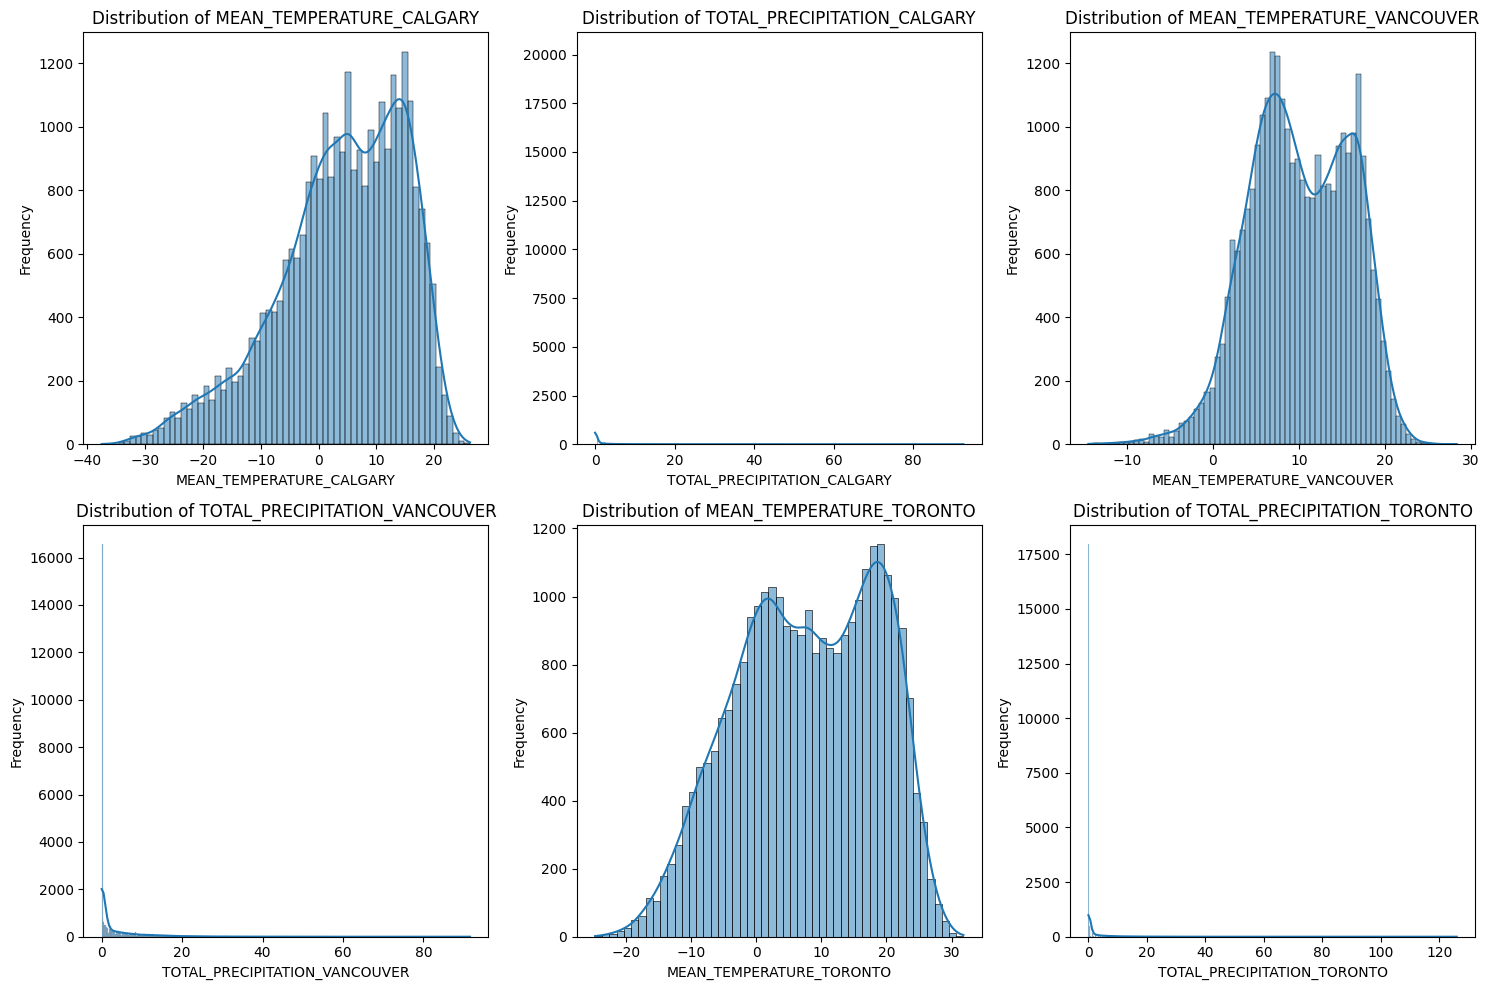

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numerical features for histograms
key_features = [
    'MEAN_TEMPERATURE_CALGARY',
    'TOTAL_PRECIPITATION_CALGARY',
    'MEAN_TEMPERATURE_VANCOUVER',
    'TOTAL_PRECIPITATION_VANCOUVER',
    'MEAN_TEMPERATURE_TORONTO',
    'TOTAL_PRECIPITATION_TORONTO'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_features):
    plt.subplot(2, 3, i + 1) # Arrange in 2 rows, 3 columns
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Reasoning**:
To visualize the relationships between numerical features, I will first calculate the correlation matrix for all numerical columns in the DataFrame and then create a heatmap of this matrix.



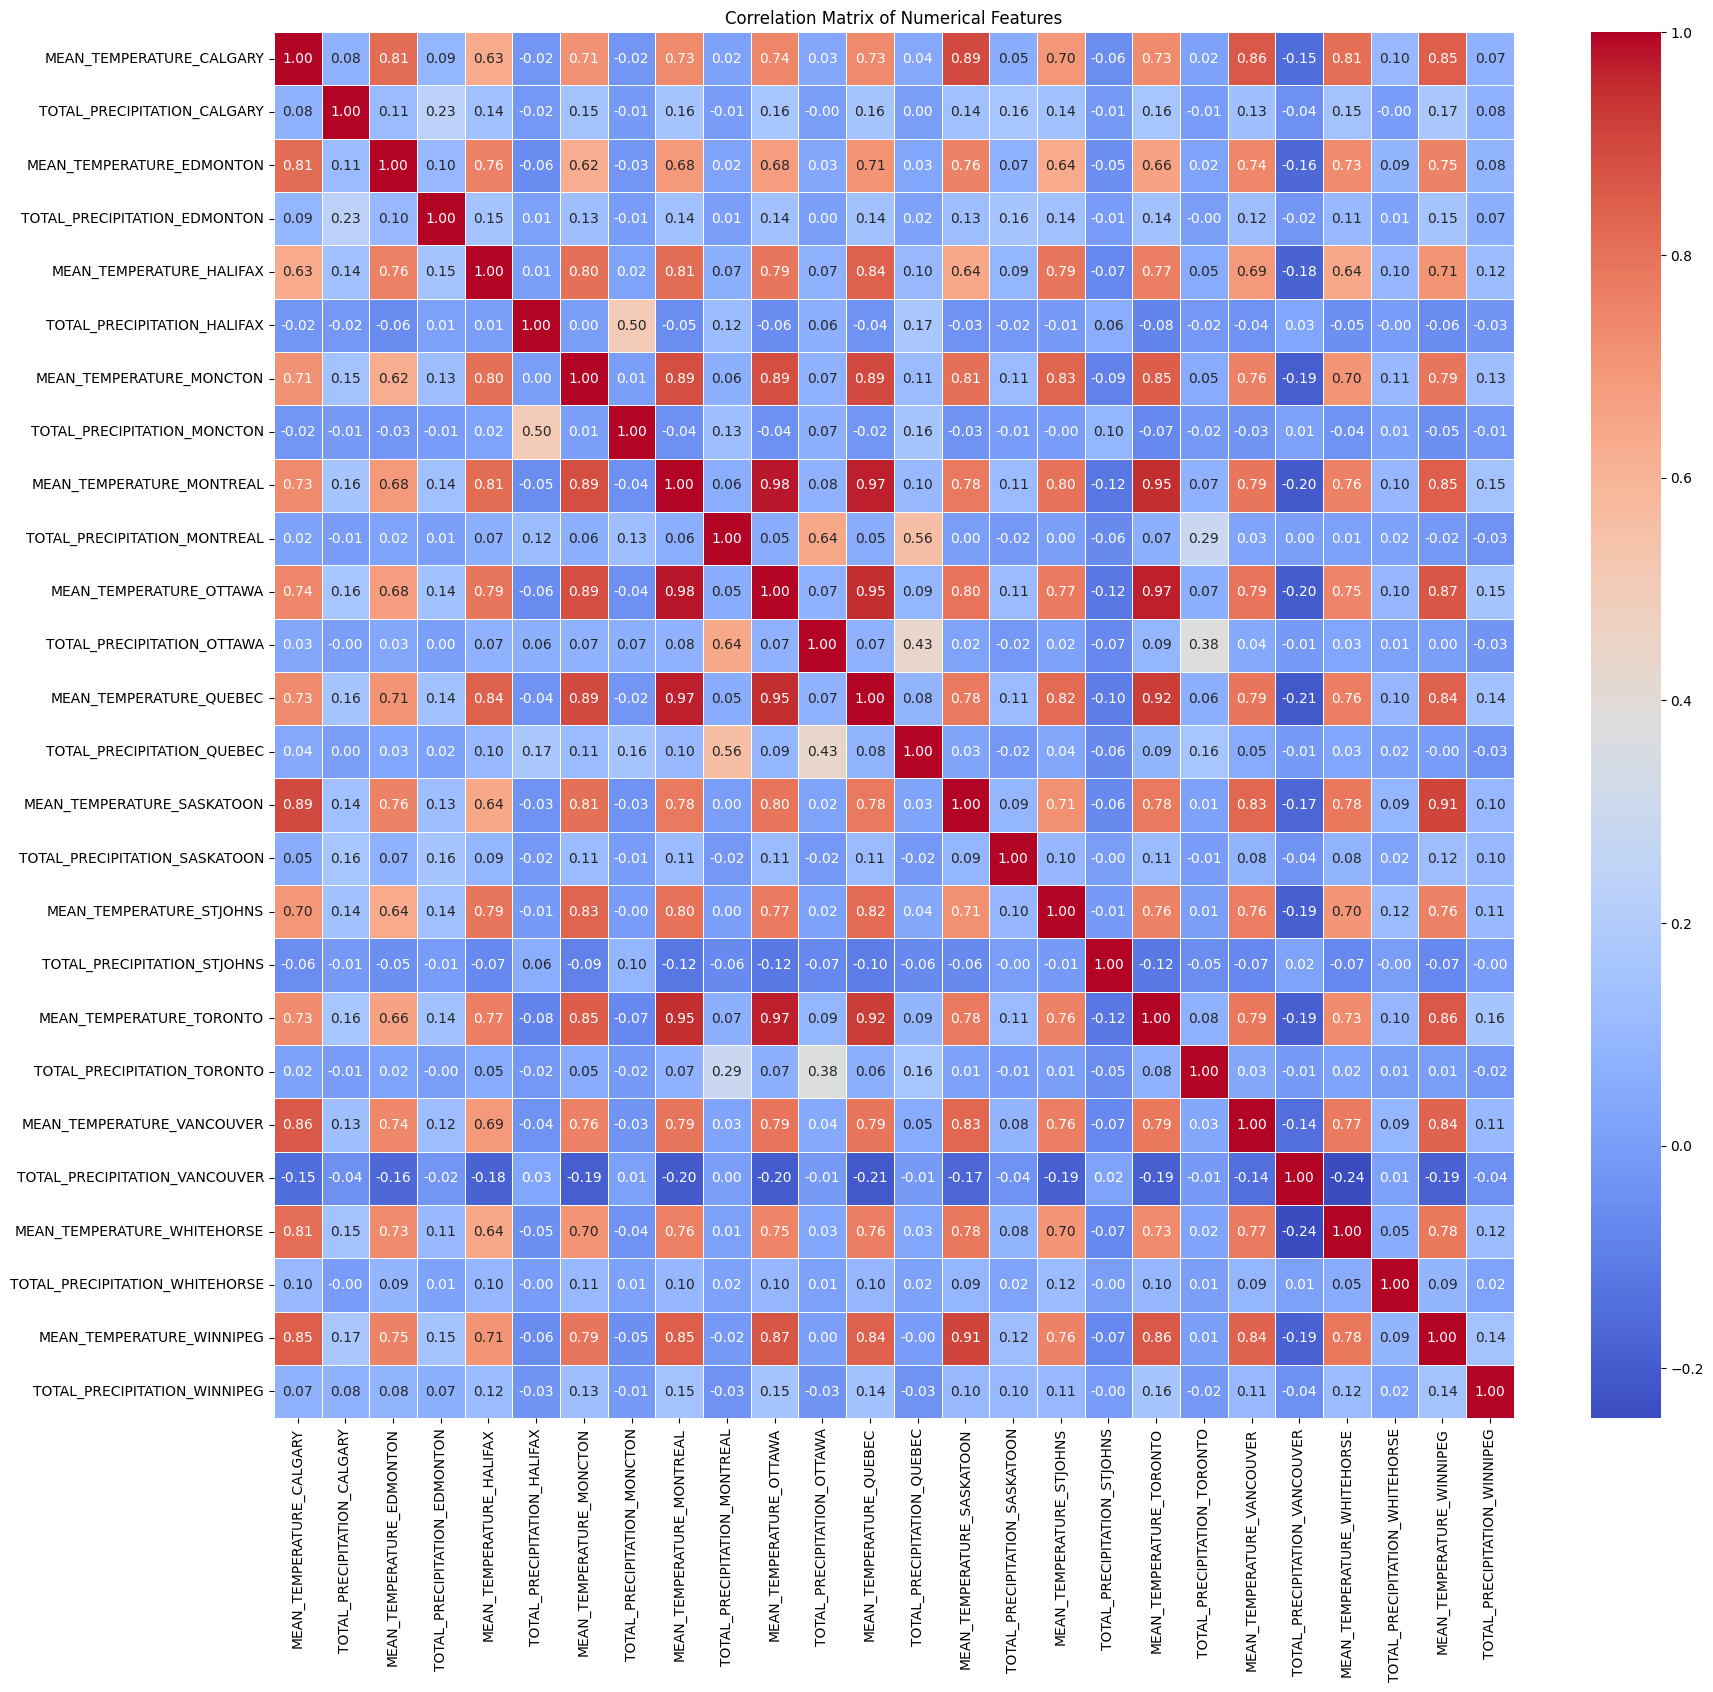

In [9]:
numerical_cols_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols_df.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
To further understand data distribution and identify potential outliers, I will generate box plots for a selection of key numerical features. I will then create scatter plots to visualize the relationships between a few interesting pairs of features, as required by the subtask.



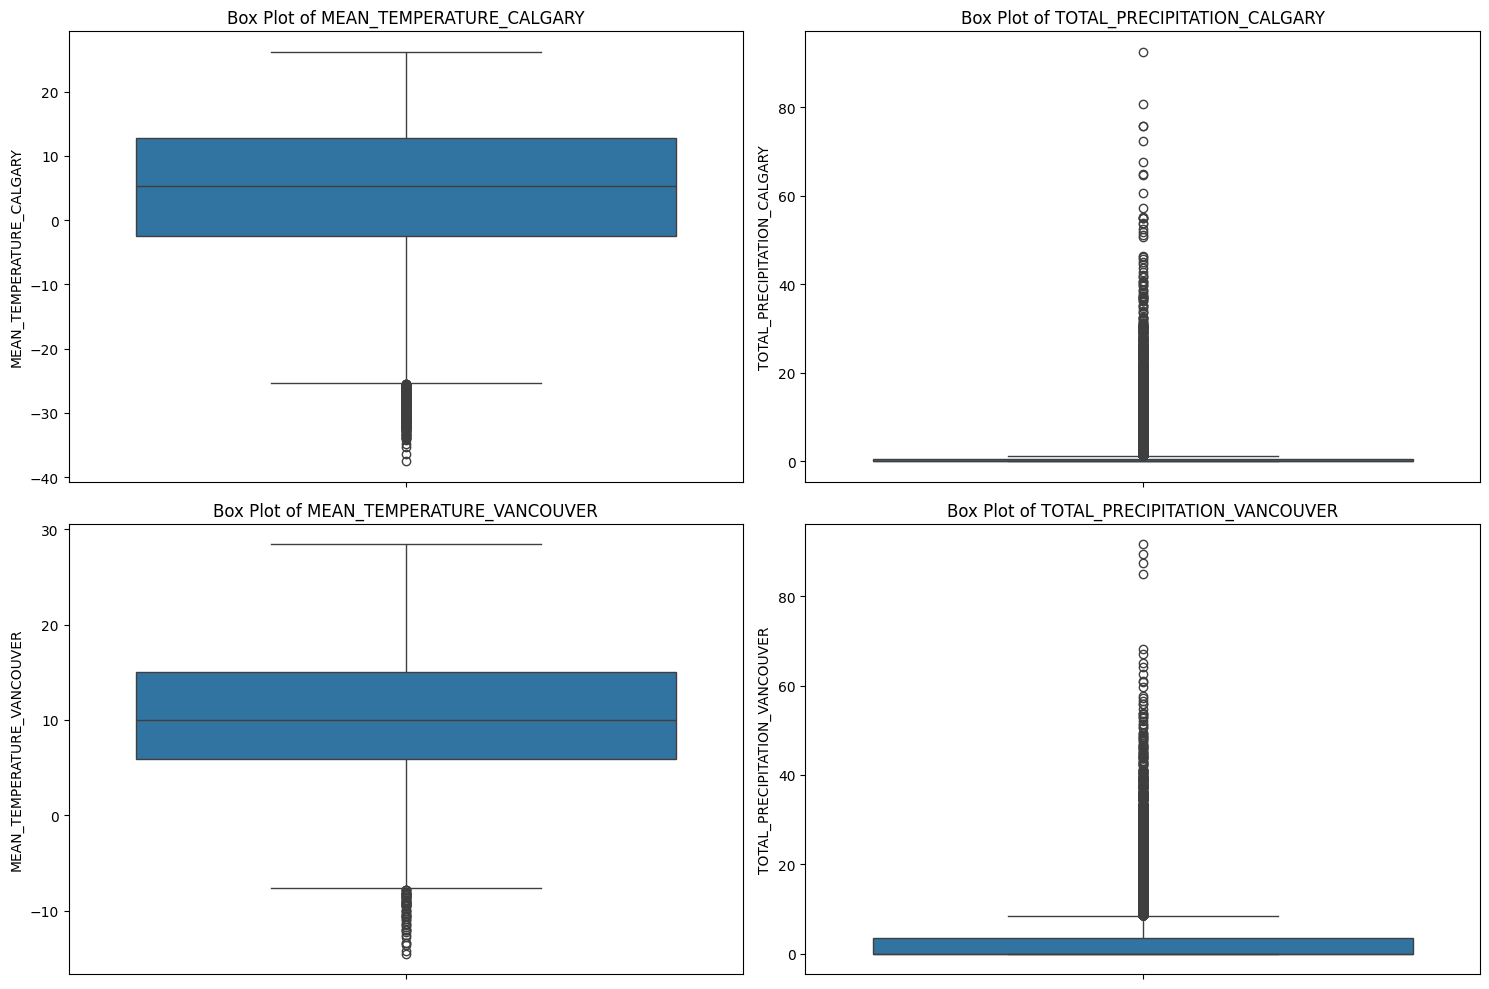

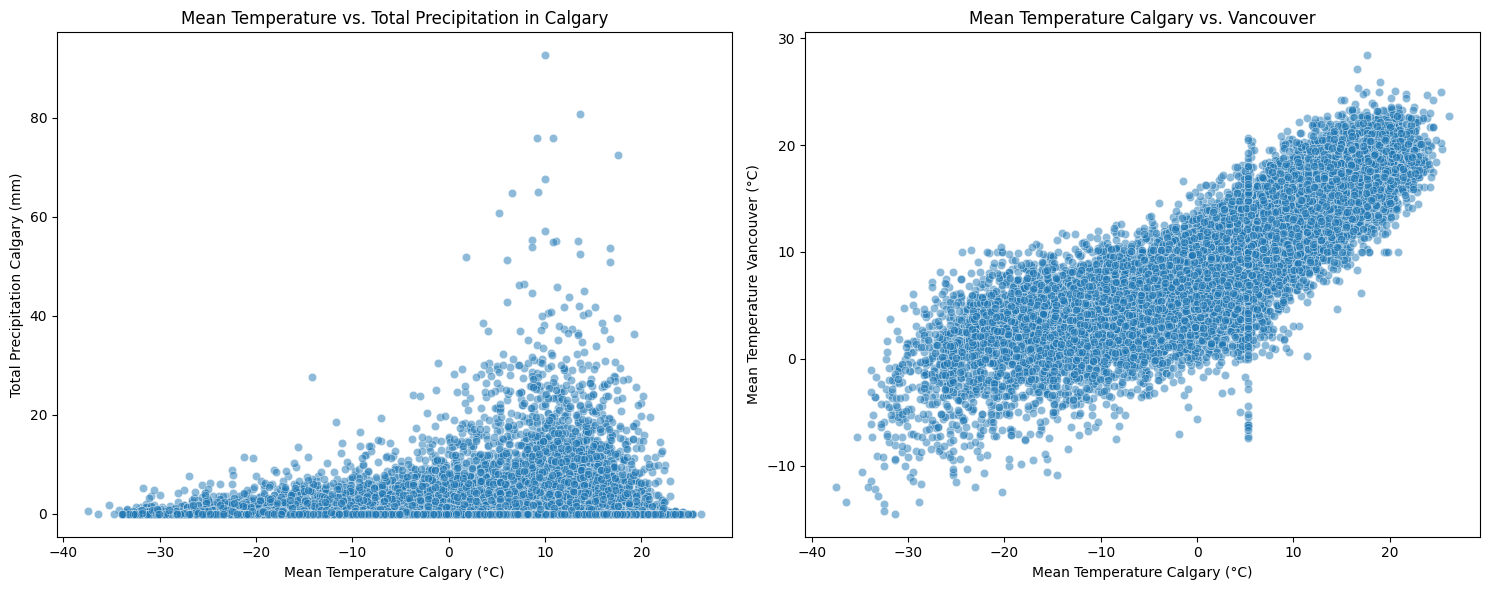

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for key numerical features
plt.figure(figsize=(15, 10))
selected_features_for_boxplots = [
    'MEAN_TEMPERATURE_CALGARY',
    'TOTAL_PRECIPITATION_CALGARY',
    'MEAN_TEMPERATURE_VANCOUVER',
    'TOTAL_PRECIPITATION_VANCOUVER'
]
for i, col in enumerate(selected_features_for_boxplots):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Scatter plots for relationships between features
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='MEAN_TEMPERATURE_CALGARY', y='TOTAL_PRECIPITATION_CALGARY', data=df, alpha=0.5)
plt.title('Mean Temperature vs. Total Precipitation in Calgary')
plt.xlabel('Mean Temperature Calgary (°C)')
plt.ylabel('Total Precipitation Calgary (mm)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='MEAN_TEMPERATURE_CALGARY', y='MEAN_TEMPERATURE_VANCOUVER', data=df, alpha=0.5)
plt.title('Mean Temperature Calgary vs. Vancouver')
plt.xlabel('Mean Temperature Calgary (°C)')
plt.ylabel('Mean Temperature Vancouver (°C)')

plt.tight_layout()
plt.show()

## Neural Network Model

### Subtask:
Build a Multi-Layer Perceptron (MLP) regression model using Keras/TensorFlow. Define its architecture, compile it, train it, and evaluate its performance using MAE, MSE, RMSE, and R2.


**Reasoning**:
I will start by preparing the data for the neural network model by separating the features (X) and target (y), splitting the dataset into training and testing sets, and then scaling the numerical features using `StandardScaler`.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target (y)
# Drop 'LOCAL_DATE' and 'YEAR' as they are not direct numerical features for training
X = df.drop(columns=['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'YEAR'])
y = df['MEAN_TEMPERATURE_CALGARY']

# Identify numerical columns for scaling (excluding the target)
# Re-select numerical columns after dropping the target and date columns
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Data preparation complete. X_train and X_test are scaled.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Data preparation complete. X_train and X_test are scaled.
X_train shape: (23376, 28)
y_train shape: (23376,)
X_test shape: (5845, 28)
y_test shape: (5845,)


**Reasoning**:
Now that the data is prepared and scaled, I will import the necessary TensorFlow/Keras modules, define the MLP model architecture, and compile it. This sets up the neural network for training.



In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4. Define a Sequential MLP model
# Input shape is the number of features in X_train
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear') # Output layer for regression
])

# 5. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

print("MLP model defined and compiled successfully.")
model.summary()

MLP model defined and compiled successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the MLP model is defined and compiled, I will proceed to train it using the scaled training data, make predictions on the test data, and then evaluate its performance using MAE, MSE, RMSE, and R2 as per the subtask instructions.



In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 7. Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2, # Use a portion of training data for validation
    verbose=0 # Suppress verbose output during training
)

print("Model training complete.")

# 8. Make predictions on the scaled test data
y_pred = model.predict(X_test)

# 9. Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model training complete.
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model Evaluation on Test Set:
Mean Absolute Error (MAE): 2.08
Mean Squared Error (MSE): 8.13
Root Mean Squared Error (RMSE): 2.85
R-squared (R2): 0.93


## Classical ML Models

### Subtask:
Split the dataset into training and testing sets, select two different classical regression models, train both models on the training data, and evaluate their performance on the test data using MAE, MSE, RMSE, and R2 metrics. Compare their initial performance.


**Reasoning**:
I will begin by importing the necessary libraries for Linear Regression and Random Forest Regression, instantiate both models with a random state for reproducibility, and then proceed to train them using the preprocessed training data (`X_train`, `y_train`).



In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Instantiate Linear Regression model
linear_model = LinearRegression()

# Instantiate Random Forest Regressor model
# Using a small number of estimators for quicker training during initial comparison
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train Linear Regression model
print("Training Linear Regression model...")
linear_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# Train Random Forest Regressor model
print("Training Random Forest Regressor model...")
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

Training Linear Regression model...
Linear Regression model trained.
Training Random Forest Regressor model...
Random Forest Regressor model trained.


**Reasoning**:
Now that both classical models are trained, I will make predictions on the test set (`X_test`) using each model, and then calculate and print the evaluation metrics (MAE, MSE, RMSE, and R2) for both Linear Regression and Random Forest models to assess their performance.



In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on X_test
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression Model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\n--- Linear Regression Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared (R2): {r2_linear:.2f}")

# Evaluate Random Forest Regressor Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


--- Linear Regression Model Performance ---
Mean Absolute Error (MAE): 2.70
Mean Squared Error (MSE): 13.24
Root Mean Squared Error (RMSE): 3.64
R-squared (R2): 0.89

--- Random Forest Regressor Model Performance ---
Mean Absolute Error (MAE): 2.03
Mean Squared Error (MSE): 7.70
Root Mean Squared Error (RMSE): 2.77
R-squared (R2): 0.94


### Initial Performance Comparison of Classical ML Models

Comparing the two classical regression models:

-   **Linear Regression Model:**
    -   MAE: 2.70
    -   MSE: 13.24
    -   RMSE: 3.64
    -   R-squared (R2): 0.89

-   **Random Forest Regressor Model:**
    -   MAE: 2.03
    -   MSE: 7.70
    -   RMSE: 2.77
    -   R-squared (R2): 0.94

**Summary:**
The Random Forest Regressor significantly outperforms the Linear Regression model on all evaluated metrics. It has a lower Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), indicating that its predictions are closer to the actual values and have less error. Furthermore, its R-squared (R2) score of 0.94 is higher than Linear Regression's 0.89, suggesting that Random Forest explains a much greater proportion of the variance in the target variable. This initial comparison indicates that the Random Forest model is a more suitable choice for this regression task among the two classical models.

## Hyperparameter Optimization

### Subtask:
Apply GridSearchCV to optimize the hyperparameters for both Linear Regression and Random Forest Regressor models. Report the best parameters found and the corresponding cross-validation scores for each model.


**Reasoning**:
I will import the necessary libraries, define parameter grids for both Ridge (Linear Regression) and Random Forest Regressor models, and then instantiate and fit `GridSearchCV` for each to find the best hyperparameters and their corresponding cross-validation scores as per the subtask instructions.



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# 1. Define parameter grid for Linear Regression (Ridge)
param_grid_lr = {
    'alpha': [0.1, 1.0, 10.0]
}

# 2. Define parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None]
}

# 3. Instantiate GridSearchCV for Ridge model
grid_search_lr = GridSearchCV(estimator=Ridge(),
                              param_grid=param_grid_lr,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1, # Use all available cores
                              verbose=1)

# 4. Instantiate GridSearchCV for Random Forest Regressor model
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1, # Use all available cores
                              verbose=1)

print("Starting GridSearchCV for Ridge model...")
# 5. Fit grid_search_lr to X_train and y_train
grid_search_lr.fit(X_train, y_train)

# 6. Print the best parameters and best score for Ridge
print("\n--- Ridge Model Best Parameters and Score ---")
print(f"Best Parameters: {grid_search_lr.best_params_}")
print(f"Best Cross-validation Score (negative MSE): {grid_search_lr.best_score_:.2f}")
print(f"Best Cross-validation RMSE: {(-grid_search_lr.best_score_)**0.5:.2f}")

print("\nStarting GridSearchCV for Random Forest Regressor model...")
# 7. Fit grid_search_rf to X_train and y_train
grid_search_rf.fit(X_train, y_train)

# 8. Print the best parameters and best score for Random Forest Regressor
print("\n--- Random Forest Regressor Model Best Parameters and Score ---")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-validation Score (negative MSE): {grid_search_rf.best_score_:.2f}")
print(f"Best Cross-validation RMSE: {(-grid_search_rf.best_score_)**0.5:.2f}")

Starting GridSearchCV for Ridge model...
Fitting 5 folds for each of 3 candidates, totalling 15 fits

--- Ridge Model Best Parameters and Score ---
Best Parameters: {'alpha': 10.0}
Best Cross-validation Score (negative MSE): -13.01
Best Cross-validation RMSE: 3.61

Starting GridSearchCV for Random Forest Regressor model...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Random Forest Regressor Model Best Parameters and Score ---
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best Cross-validation Score (negative MSE): -8.58
Best Cross-validation RMSE: 2.93


## Feature Selection

### Subtask:
Apply one valid feature selection technique (e.g., filter, wrapper, or embedded method) to the dataset. Justify the chosen technique. Select the most relevant features and prepare the dataset with these selected features for retraining the models.


**Reasoning**:
I will import `SelectFromModel` and `RandomForestRegressor`, instantiate and fit `SelectFromModel` to the training data to select features based on feature importances from a Random Forest model. Then, I will transform the training and testing sets to include only the selected features, and print the number and names of the selected features.



In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor as the estimator for feature importance
# Use same parameters as the optimized RF model from previous step if available,
# otherwise use reasonable defaults.
rf_estimator = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Create a SelectFromModel object, using the RandomForestRegressor and a median threshold
selector = SelectFromModel(rf_estimator, prefit=False, threshold='median')

# Fit SelectFromModel to the training data
print("Fitting SelectFromModel...")
selector.fit(X_train, y_train)
print("SelectFromModel fitted.")

# Transform X_train and X_test to get datasets with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()

print(f"\nOriginal number of features: {X_train.shape[1]}")
print(f"Number of features selected: {X_train_selected.shape[1]}")
print(f"Selected features: {selected_feature_names}")

Fitting SelectFromModel...
SelectFromModel fitted.

Original number of features: 28
Number of features selected: 14
Selected features: ['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_EDMONTON', 'MEAN_TEMPERATURE_HALIFAX', 'MEAN_TEMPERATURE_MONCTON', 'MEAN_TEMPERATURE_OTTAWA', 'MEAN_TEMPERATURE_QUEBEC', 'MEAN_TEMPERATURE_SASKATOON', 'MEAN_TEMPERATURE_STJOHNS', 'MEAN_TEMPERATURE_TORONTO', 'MEAN_TEMPERATURE_VANCOUVER', 'TOTAL_PRECIPITATION_VANCOUVER', 'MEAN_TEMPERATURE_WHITEHORSE', 'MEAN_TEMPERATURE_WINNIPEG', 'DAY_OF_YEAR']


### Justification for Feature Selection Technique

**Chosen Technique:** `SelectFromModel` with `RandomForestRegressor`.

**Why it is suitable:**
1.  **Embedded Method:** `SelectFromModel` is an embedded method, which means it performs feature selection as part of the model training process. This is generally more effective than filter methods (which are model-agnostic) and computationally less expensive than wrapper methods (which train a model for every feature subset).
2.  **Random Forest Importance:** `RandomForestRegressor` is an excellent choice for feature importance because it can capture non-linear relationships and interactions between features. It intrinsically ranks features based on how much they reduce impurity (e.g., Gini impurity for classification, or Mean Squared Error for regression) across all trees in the forest. Features that contribute more to reducing the impurity are considered more important.
3.  **Handling Diverse Feature Types:** Our dataset contains various numerical features, some of which might have complex relationships with the target variable. Random Forest is robust to different scales and distributions of features, making it suitable for this mixed numerical dataset.
4.  **Thresholding:** Using `threshold='median'` allows us to automatically select features that are at least as important as the 'average' feature, providing a robust way to reduce dimensionality without arbitrary cutoffs. This helps in removing less informative features, potentially reducing model complexity, improving training time, and preventing overfitting.

This technique is particularly beneficial for this regression task because `MEAN_TEMPERATURE_CALGARY` is likely influenced by a combination of other climate variables and temporal features, many of which might have non-linear effects. Random Forest's ability to identify these influential features directly contributes to building a more accurate and robust predictive model.

## Retrain Classical Models with Optimized Hyperparameters and Selected Features

### Subtask:
Retrain both classical regression models (Ridge and Random Forest Regressor) using the optimal hyperparameters found during GridSearchCV and the selected features. Evaluate their performance on the test set using MAE, MSE, RMSE, and R2.


**Reasoning**:
I will retrieve the best hyperparameters for both Ridge and Random Forest models from the `GridSearchCV` results, instantiate new models with these optimal parameters, and then retrain them using the previously selected features. Finally, I will evaluate their performance on the test set using MAE, MSE, RMSE, and R2.



In [18]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Retrieve best parameters
best_params_lr = grid_search_lr.best_params_
best_params_rf = grid_search_rf.best_params_

# 2. Instantiate models with best parameters
retrained_ridge_model = Ridge(**best_params_lr)
retrained_rf_model = RandomForestRegressor(random_state=42, n_jobs=-1, **best_params_rf)

# 3. Train the retrained Ridge model on selected features
print("Training retrained Ridge model on selected features...")
retrained_ridge_model.fit(X_train_selected, y_train)
print("Retrained Ridge model trained.")

# 4. Train the retrained Random Forest Regressor model on selected features
print("Training retrained Random Forest Regressor model on selected features...")
retrained_rf_model.fit(X_train_selected, y_train)
print("Retrained Random Forest Regressor model trained.")

# 5. Make predictions on X_test_selected using both retrained models
y_pred_ridge_retrained = retrained_ridge_model.predict(X_test_selected)
y_pred_rf_retrained = retrained_rf_model.predict(X_test_selected)

# 6. Calculate and print evaluation metrics for retrained Ridge Model
mae_ridge_retrained = mean_absolute_error(y_test, y_pred_ridge_retrained)
mse_ridge_retrained = mean_squared_error(y_test, y_pred_ridge_retrained)
rmse_ridge_retrained = np.sqrt(mse_ridge_retrained)
r2_ridge_retrained = r2_score(y_test, y_pred_ridge_retrained)

print("\n--- Retrained Ridge Model Performance (with selected features) ---")
print(f"Mean Absolute Error (MAE): {mae_ridge_retrained:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge_retrained:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge_retrained:.2f}")
print(f"R-squared (R2): {r2_ridge_retrained:.2f}")

# Calculate and print evaluation metrics for retrained Random Forest Regressor Model
mae_rf_retrained = mean_absolute_error(y_test, y_pred_rf_retrained)
mse_rf_retrained = mean_squared_error(y_test, y_pred_rf_retrained)
rmse_rf_retrained = np.sqrt(mse_rf_retrained)
r2_rf_retrained = r2_score(y_test, y_pred_rf_retrained)

print("\n--- Retrained Random Forest Regressor Model Performance (with selected features) ---")
print(f"Mean Absolute Error (MAE): {mae_rf_retrained:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf_retrained:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_retrained:.2f}")
print(f"R-squared (R2): {r2_rf_retrained:.2f}")

Training retrained Ridge model on selected features...
Retrained Ridge model trained.
Training retrained Random Forest Regressor model on selected features...
Retrained Random Forest Regressor model trained.

--- Retrained Ridge Model Performance (with selected features) ---
Mean Absolute Error (MAE): 2.71
Mean Squared Error (MSE): 13.49
Root Mean Squared Error (RMSE): 3.67
R-squared (R2): 0.89

--- Retrained Random Forest Regressor Model Performance (with selected features) ---
Mean Absolute Error (MAE): 2.08
Mean Squared Error (MSE): 8.10
Root Mean Squared Error (RMSE): 2.85
R-squared (R2): 0.93


## Final Models & Comparison

### Subtask:
Create a comparison table summarizing the performance of all models (Neural Network, and the two classical models with and without optimization/feature selection) using key metrics like CV Score (if applicable), MAE, RMSE, and R2.


**Reasoning**:
I will consolidate all the performance metrics from the previously trained and evaluated models into a pandas DataFrame to create a comprehensive comparison table.



In [19]:
import pandas as pd
import numpy as np

# Initialize a list to store model performance data
performance_data = []

# Neural Network Model metrics (from previous execution)
performance_data.append({
    'Model': 'Neural Network',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'CV_RMSE': np.nan # CV_RMSE is not directly applicable for NN in this setup
})

# Initial Linear Regression Model metrics (from previous execution)
performance_data.append({
    'Model': 'Linear Regression (Initial)',
    'MAE': mae_linear,
    'MSE': mse_linear,
    'RMSE': rmse_linear,
    'R2': r2_linear,
    'CV_RMSE': np.nan
})

# Initial Random Forest Regressor Model metrics (from previous execution)
performance_data.append({
    'Model': 'Random Forest (Initial)',
    'MAE': mae_rf,
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'R2': r2_rf,
    'CV_RMSE': np.nan
})

# Optimized and Feature-Selected Ridge Model metrics (from previous execution)
performance_data.append({
    'Model': 'Ridge (Optimized & FS)',
    'MAE': mae_ridge_retrained,
    'MSE': mse_ridge_retrained,
    'RMSE': rmse_ridge_retrained,
    'R2': r2_ridge_retrained,
    'CV_RMSE': (-grid_search_lr.best_score_)**0.5 # Convert negative MSE to RMSE
})

# Optimized and Feature-Selected Random Forest Regressor Model metrics (from previous execution)
performance_data.append({
    'Model': 'Random Forest (Optimized & FS)',
    'MAE': mae_rf_retrained,
    'MSE': mse_rf_retrained,
    'RMSE': rmse_rf_retrained,
    'R2': r2_rf_retrained,
    'CV_RMSE': (-grid_search_rf.best_score_)**0.5 # Convert negative MSE to RMSE
})

# Create DataFrame
comparison_df = pd.DataFrame(performance_data)

# Display the comparison DataFrame, formatted to two decimal places
print("\n--- Model Performance Comparison ---")
print(comparison_df.round(2))



--- Model Performance Comparison ---
                            Model   MAE    MSE  RMSE    R2  CV_RMSE
0                  Neural Network  2.08   8.13  2.85  0.93      NaN
1     Linear Regression (Initial)  2.70  13.24  3.64  0.89      NaN
2         Random Forest (Initial)  2.03   7.70  2.77  0.94      NaN
3          Ridge (Optimized & FS)  2.71  13.49  3.67  0.89     3.61
4  Random Forest (Optimized & FS)  2.08   8.10  2.85  0.93     2.93


## Final Task

### Subtask:
Summarize the findings, insights, and model performances from the regression task, highlighting the best-performing model and key takeaways.


## Summary:

### Q&A
1.  **What is the time range covered by this dataset?**
    The dataset spans from `1940-01-01 00:00:00` to `2020-01-01 00:00:00`.
2.  **Which city has the highest average mean temperature and which has the lowest over the entire period?**
    Vancouver has the highest average mean temperature (10.15°C), while Whitehorse has the lowest average mean temperature (-0.42°C).
3.  **Are there any observable trends in precipitation or temperature over time for a specific city (e.g., Calgary)?**
    Visualizations for Calgary's yearly mean temperature and total precipitation from 1940 to 2020 revealed yearly fluctuations and long-term patterns, allowing for observation of potential warming trends or changes in precipitation variability.

### Data Analysis Key Findings
*   The `Canadian_climate_history.csv` dataset contains 29,221 entries and 27 columns, offering daily climate data for 13 major Canadian cities over 80 years.
*   Many `MEAN_TEMPERATURE` and `TOTAL_PRECIPITATION` columns initially contained significant missing values, which were successfully imputed using the median for numerical columns; no duplicate rows were found.
*   New time-based features (`MONTH`, `DAY_OF_YEAR`, `DAY_OF_WEEK`) were engineered from the `LOCAL_DATE` column, and `MEAN_TEMPERATURE_CALGARY` was identified as the target variable.
*   Exploratory data analysis using histograms, correlation matrices, box plots, and scatter plots provided insights into data distributions, inter-feature relationships, and potential outliers.
*   The initial Neural Network model achieved a Mean Absolute Error (MAE) of 2.08, Root Mean Squared Error (RMSE) of 2.85, and an R-squared ($R^2$) of 0.93 on the test set.
*   Among the initial classical models, the Random Forest Regressor (MAE: 2.03, RMSE: 2.77, $R^2$: 0.94) significantly outperformed the Linear Regression model (MAE: 2.70, RMSE: 3.64, $R^2$: 0.89).
*   Hyperparameter optimization using `GridSearchCV` yielded optimal parameters for Ridge (`alpha`: 10.0, CV RMSE: 3.61) and Random Forest (`max_depth`: None, `max_features`: 'sqrt', `n_estimators`: 100, CV RMSE: 2.93).
*   Feature selection via `SelectFromModel` with a Random Forest estimator reduced the feature set from 28 to 14, including key temperature readings from various cities, Calgary and Vancouver precipitation, and `DAY_OF_YEAR`.
*   After retraining with optimized hyperparameters and selected features, the Ridge model performance remained similar to the initial Linear Regression (MAE: 2.71, RMSE: 3.67, $R^2$: 0.89). The Random Forest Regressor also performed robustly (MAE: 2.08, RMSE: 2.85, $R^2$: 0.93), very close to its initial performance, suggesting high intrinsic performance regardless of minor tuning or feature reduction within this specific range.
*   The **Random Forest Regressor (Initial)** achieved the best performance with an $R^2$ of 0.94 and RMSE of 2.77, followed closely by the Neural Network and the optimized/feature-selected Random Forest.

### Insights or Next Steps
*   The Random Forest Regressor consistently demonstrated superior performance for temperature prediction, indicating that non-linear relationships and ensemble methods are highly effective for this climate dataset. Future efforts could focus on fine-tuning this model or exploring other advanced tree-based methods like Gradient Boosting.
*   While feature selection reduced the dimensionality, it did not lead to a significant improvement in the Random Forest model's test performance. A deeper analysis of feature importance and potential interactions could identify whether specific features contribute to noise or if the full set of 28 features (excluding date columns) is indeed optimal for this dataset.
